In [78]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [79]:
def build_model():
  model=VGG16()
  return model

In [80]:
my_model=build_model()
my_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
print(my_model.layers)

[<InputLayer name=input_layer_7, built=True>, <Conv2D name=block1_conv1, built=True>, <Conv2D name=block1_conv2, built=True>, <MaxPooling2D name=block1_pool, built=True>, <Conv2D name=block2_conv1, built=True>, <Conv2D name=block2_conv2, built=True>, <MaxPooling2D name=block2_pool, built=True>, <Conv2D name=block3_conv1, built=True>, <Conv2D name=block3_conv2, built=True>, <Conv2D name=block3_conv3, built=True>, <MaxPooling2D name=block3_pool, built=True>, <Conv2D name=block4_conv1, built=True>, <Conv2D name=block4_conv2, built=True>, <Conv2D name=block4_conv3, built=True>, <MaxPooling2D name=block4_pool, built=True>, <Conv2D name=block5_conv1, built=True>, <Conv2D name=block5_conv2, built=True>, <Conv2D name=block5_conv3, built=True>, <MaxPooling2D name=block5_pool, built=True>, <Flatten name=flatten, built=True>, <Dense name=fc1, built=True>, <Dense name=fc2, built=True>, <Dense name=predictions, built=True>]


In [82]:
print(my_model.layers[1])

<Conv2D name=block1_conv1, built=True>


In [83]:
print(type(my_model.layers[1]))

<class 'keras.src.layers.convolutional.conv2d.Conv2D'>


In [84]:
print(type(my_model.layers[1].name))

<class 'str'>


In [85]:
print(my_model.layers[1].name)

block1_conv1


In [86]:
filters,biases=my_model.layers[1].get_weights()

In [87]:
print(filters.shape)

(3, 3, 3, 64)


In [88]:
filters,biases=my_model.layers[2].get_weights()
print(filters.shape)

(3, 3, 64, 64)


## what does this 3,3,64,64 mean?

it means 3*3 is the filter size

last 64 means no fo filters so total 64 fillters are there

secound last 64 means the channel no hows 64 channel possible or what does it does i dont know in image IDK


Shape: (3, 3, 256, 512)


Explanation:

3*3 is filter size


The input has 256 channels.


no of filters is 512



vane xin hamle 1st ko 2nd ko lai chai use gare ra display garauni
last ko value chai iterate ko lagi,aani 3rd ko pani iterate garni raixa channel aanusar ni filter farak farak huni raixa

In [89]:
type(filters)

numpy.ndarray

In [90]:
filters.shape

(3, 3, 64, 64)

These are the some filters of the first convolution layer


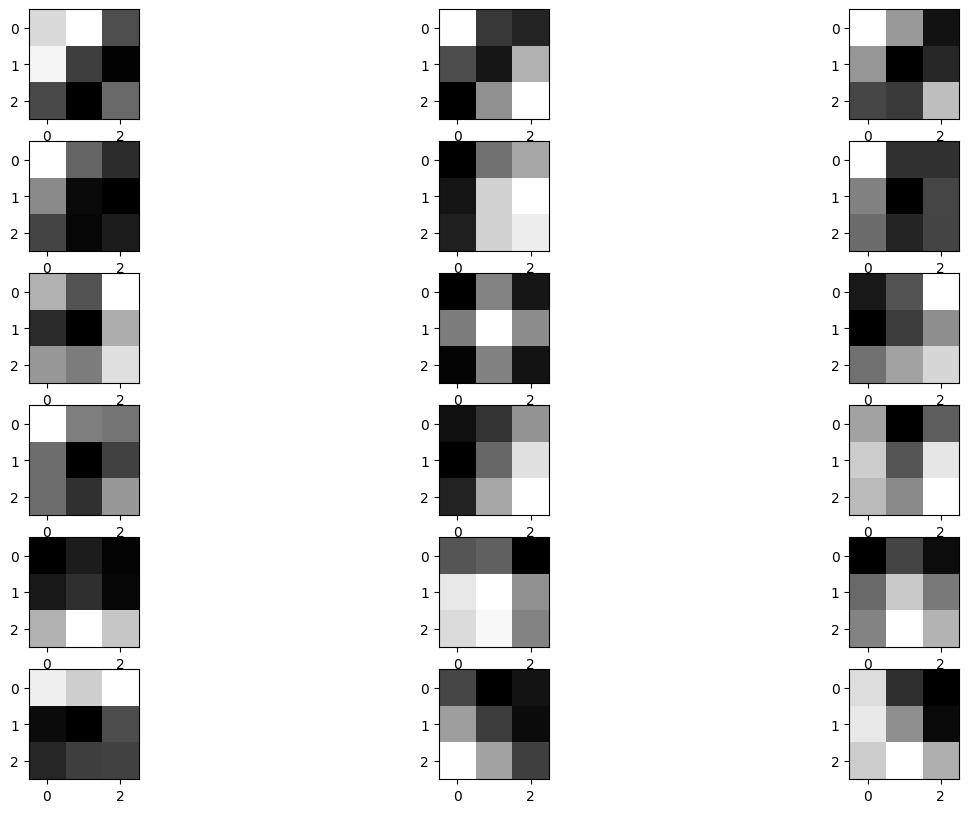

In [91]:
print("These are the some filters of the first convolution layer")
fig = plt.figure(figsize=(15,10))
p=1
for i in range(6):
  my_filter=filters[:,:,:,i]
  #aaba feri channel lai ni iterate garnu paryo

  for j in range(3):
    plt.subplot(6,3,p)
    plt.imshow(my_filter[:,:,j],cmap='gray')
    p +=1




In [92]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [93]:
val_images=tf.data.Dataset.list_files('/content/002_42.23.JPG',shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (224,224)))
val_images = val_images.map(lambda x: x/255)


In [94]:
len(val_images)

1

In [95]:
val_images=val_images.batch(1)

In [96]:
model = Model(inputs=my_model.inputs , outputs=my_model.layers[1].output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


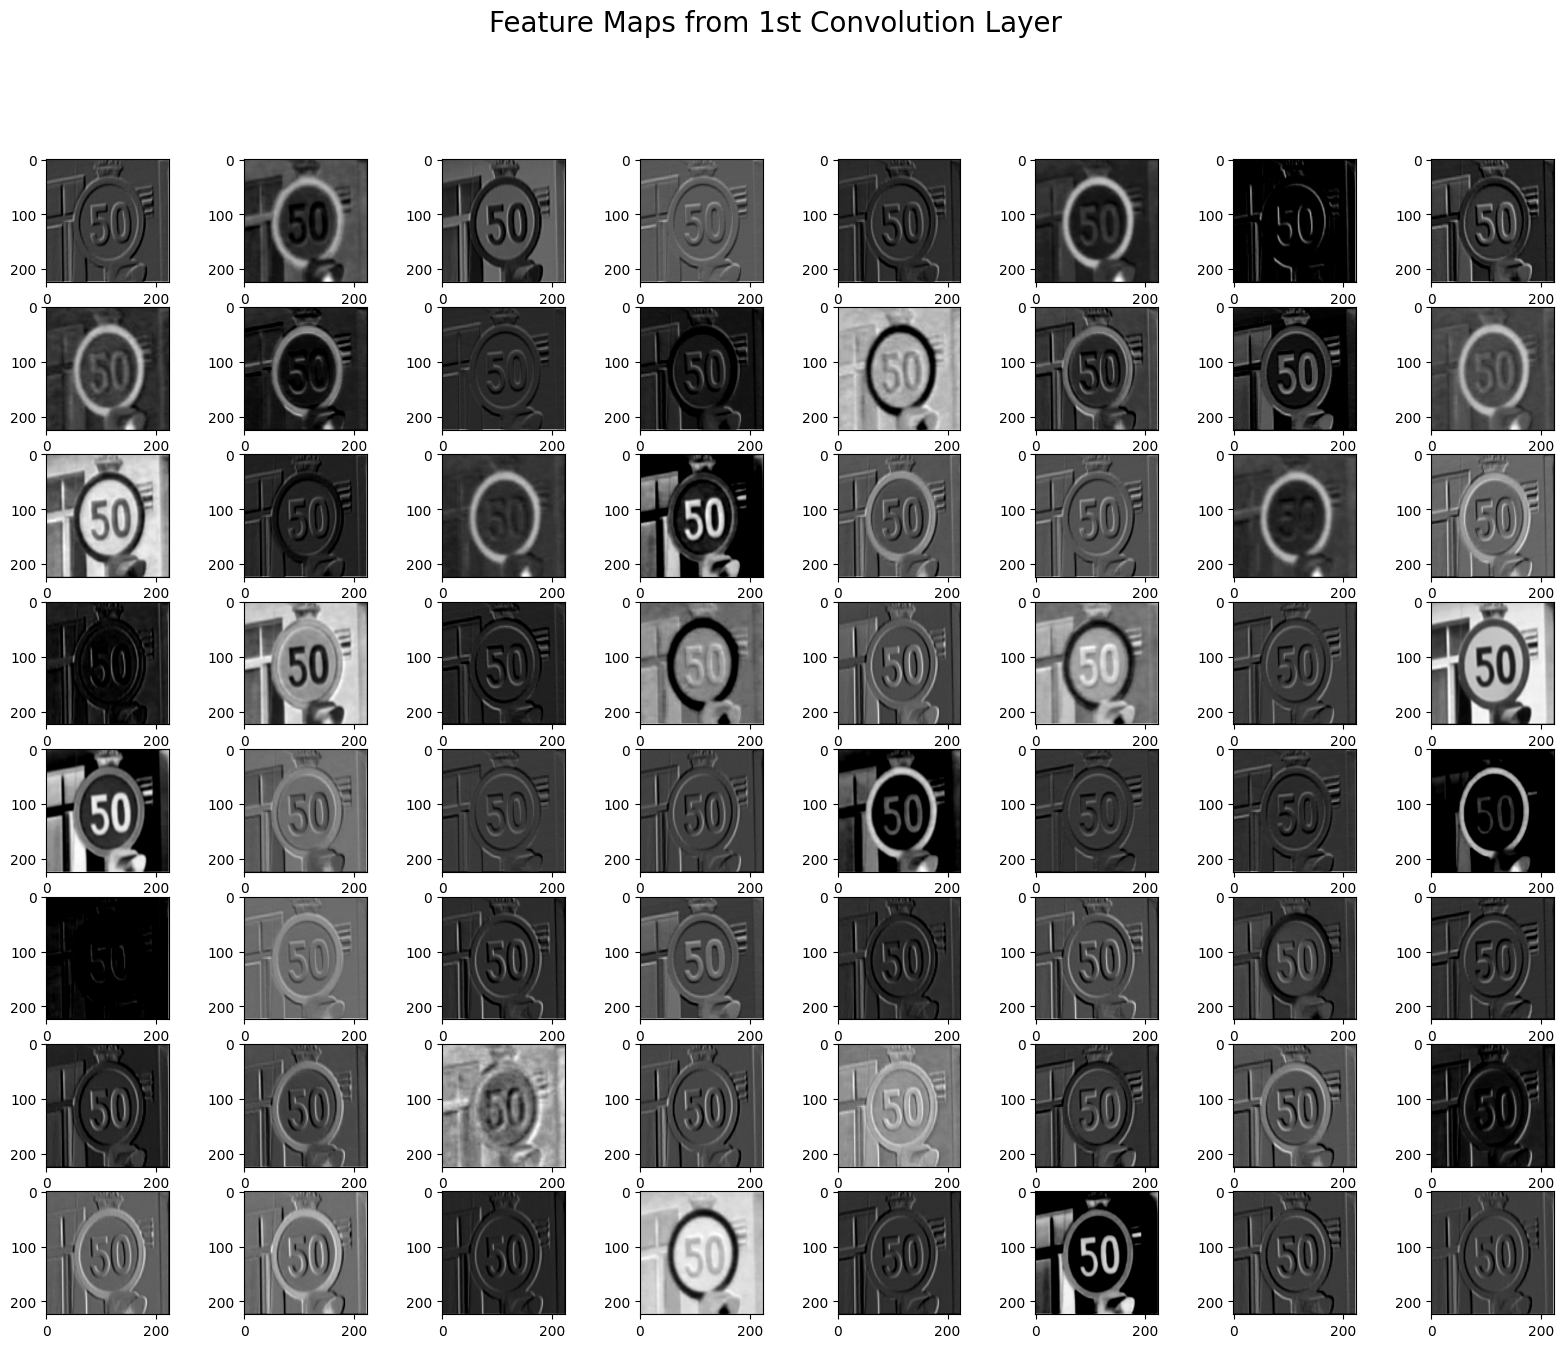

In [97]:
#calculating features_map
features = model.predict(val_images)

fig = plt.figure(figsize=(20,15))
fig.suptitle("Feature Maps from 1st Convolution Layer", fontsize=20)
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

outputing the features learned by model by 2nd convolution layers
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


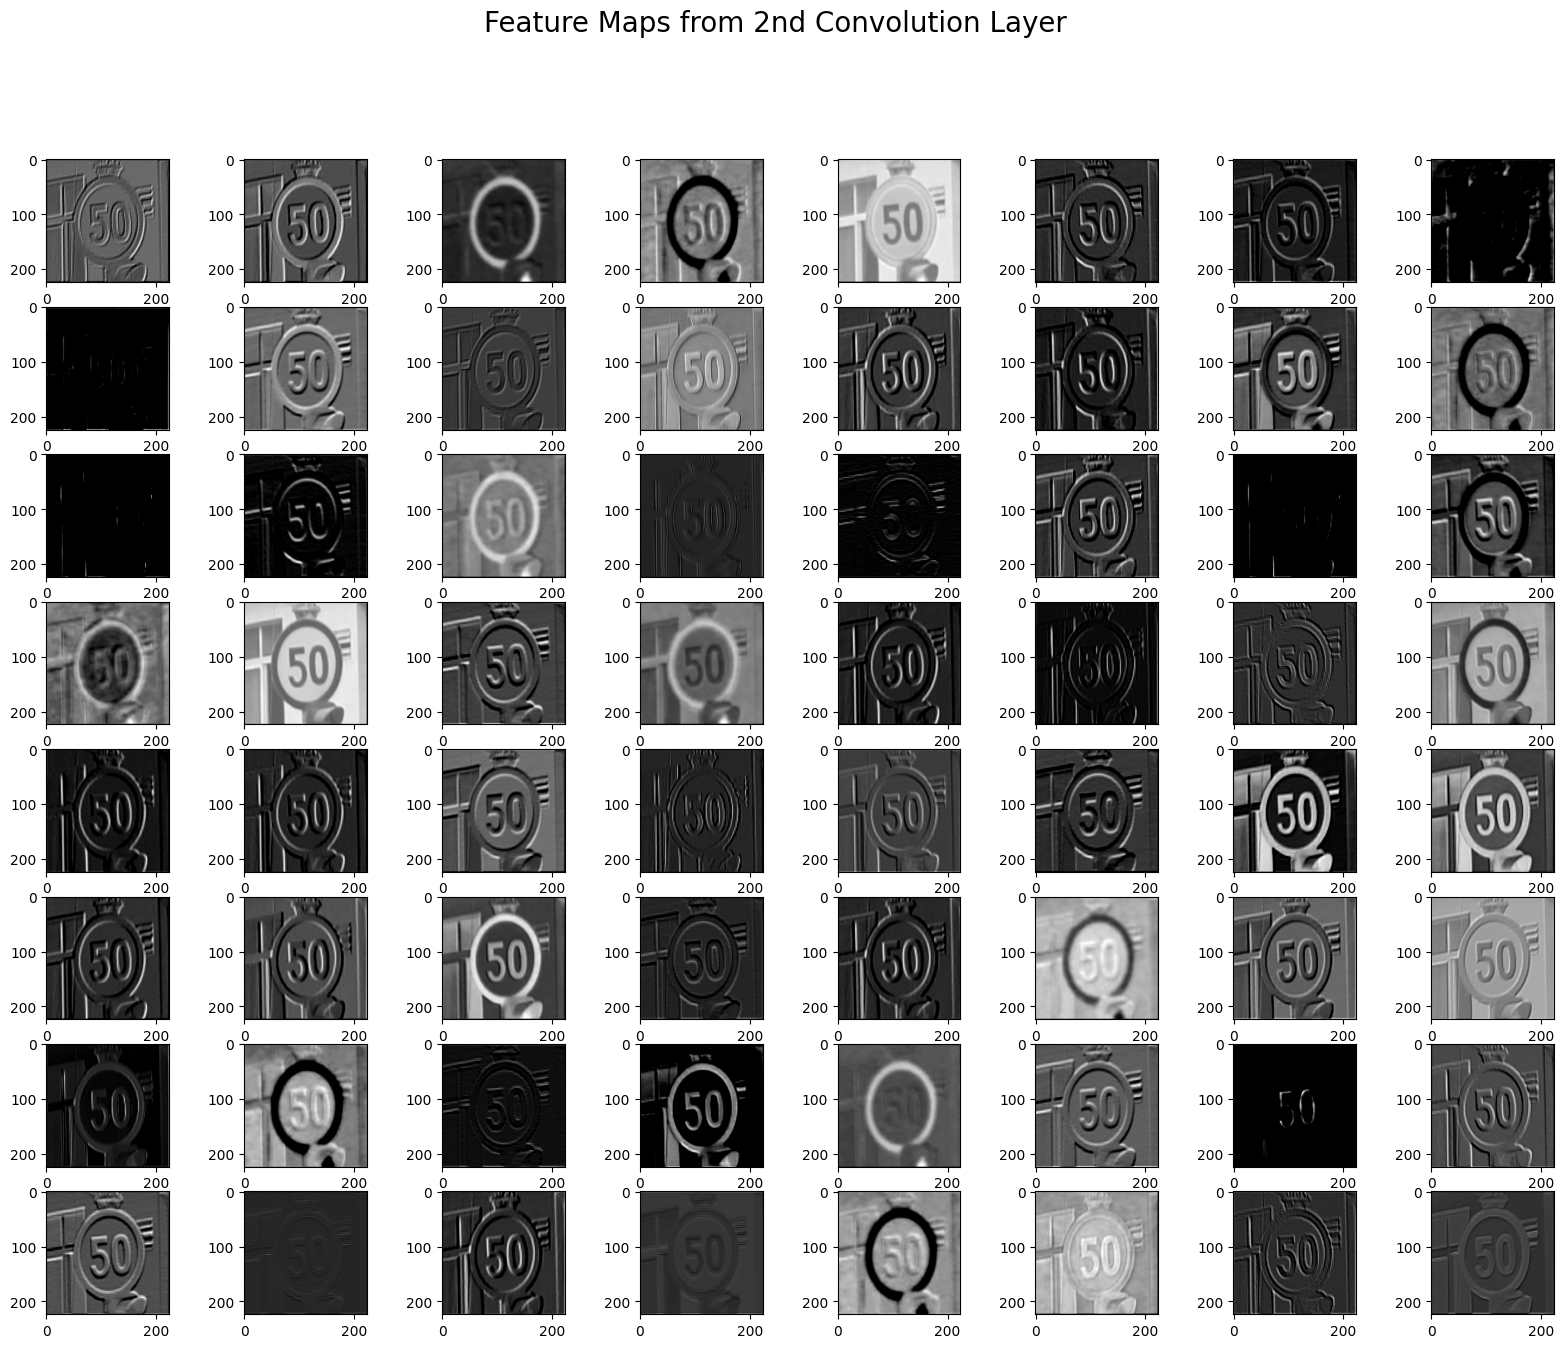

In [98]:
print("outputing the features learned by model by 2nd convolution layers")
model = Model(inputs=my_model.inputs , outputs=my_model.layers[2].output)
#calculating features_map
features = model.predict(val_images)

fig = plt.figure(figsize=(20,15))
fig.suptitle("Feature Maps from 2nd Convolution Layer", fontsize=20)
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

Outputting the features learned by the model's 5th convolution layer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


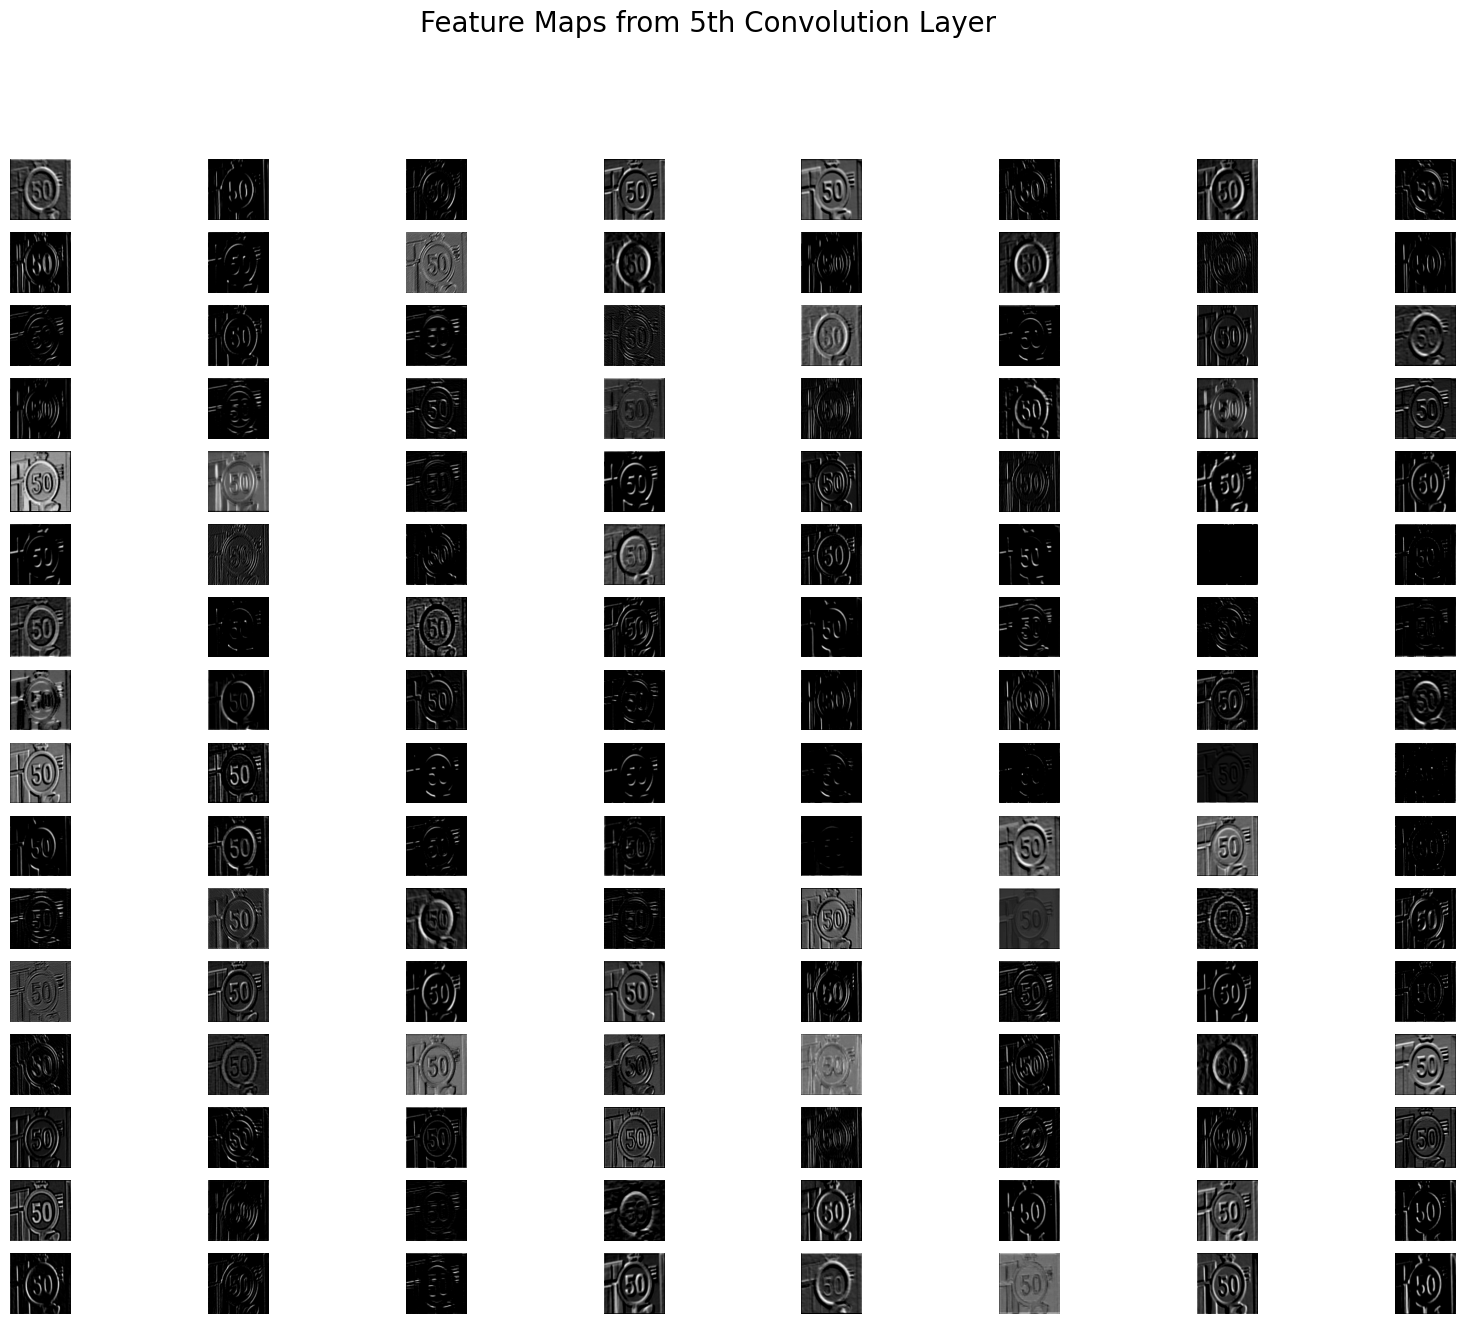

In [ ]:
print("Outputting the features learned by the model's 5th convolution layer")

# Create a model to extract the output of the 5th convolution layer
model = Model(inputs=my_model.inputs, outputs=my_model.layers[5].output)

# Calculate the feature maps
features = model.predict(val_images)

# Determine the number of feature maps
num_feature_maps = features.shape[-1]

# Calculate the grid size needed to fit all feature maps
num_cols = 8  # Number of columns in the grid
num_rows = math.ceil(num_feature_maps / num_cols)  # Calculate number of rows needed

# Create a figure for displaying the feature maps
fig = plt.figure(figsize=(20, 15))
fig.suptitle("Feature Maps from 5th Convolution Layer", fontsize=20)

# Plot each feature map
for i in range(num_feature_maps):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(features[0, :, :, i], cmap='gray')  # Adjust for the batch dimension
    plt.axis('off')  # Hide axes for better visualization

# Show the plot
plt.show()

Outputting the features learned by the model's 12th convolution layer
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


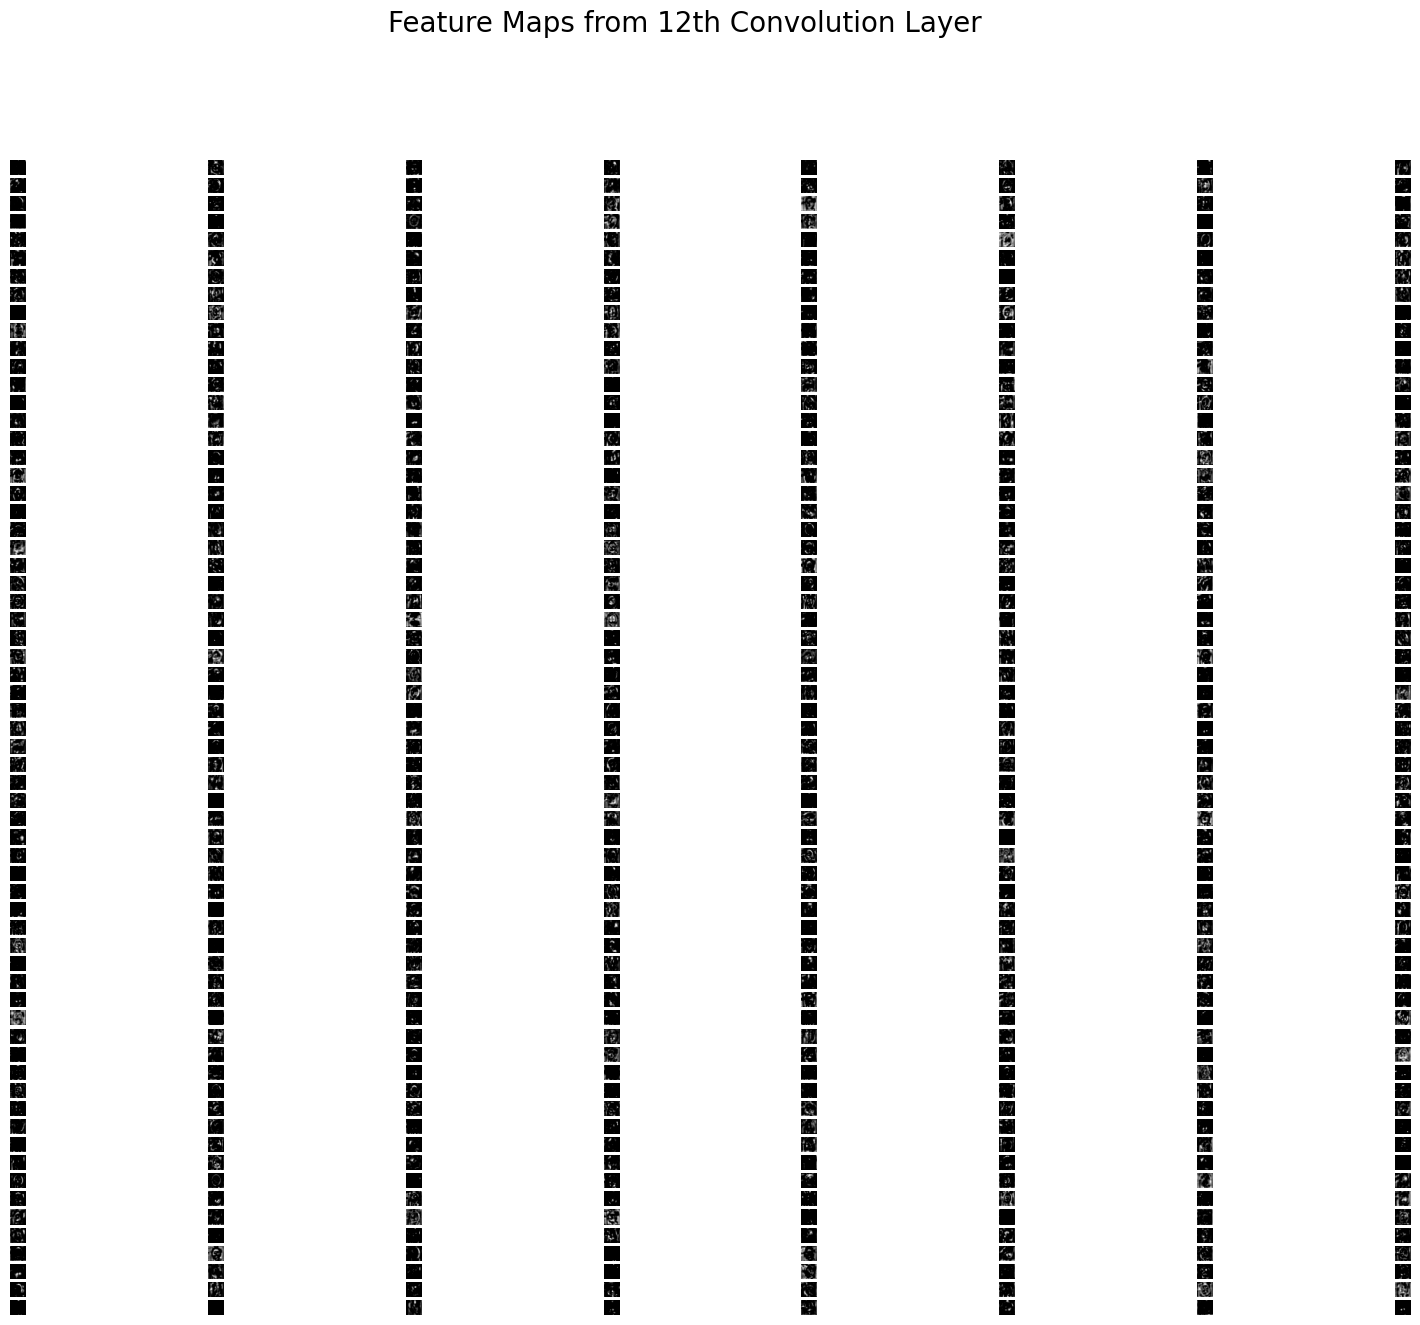

In [ ]:
print("Outputting the features learned by the model's 12th convolution layer")

# Create a model to extract the output of the 5th convolution layer
model = Model(inputs=my_model.inputs, outputs=my_model.layers[12].output)

# Calculate the feature maps
features = model.predict(val_images)

# Determine the number of feature maps
num_feature_maps = features.shape[-1]

# Calculate the grid size needed to fit all feature maps
num_cols = 8  # Number of columns in the grid
num_rows = math.ceil(num_feature_maps / num_cols)  # Calculate number of rows needed

# Create a figure for displaying the feature maps
fig = plt.figure(figsize=(20, 15))
fig.suptitle("Feature Maps from 12th Convolution Layer", fontsize=20)

# Plot each feature map
for i in range(num_feature_maps):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(features[0, :, :, i], cmap='gray')  # Adjust for the batch dimension
    plt.axis('off')  # Hide axes for better visualization

# Show the plot
plt.show()

Outputting the features learned by the model's 12th convolution layer
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


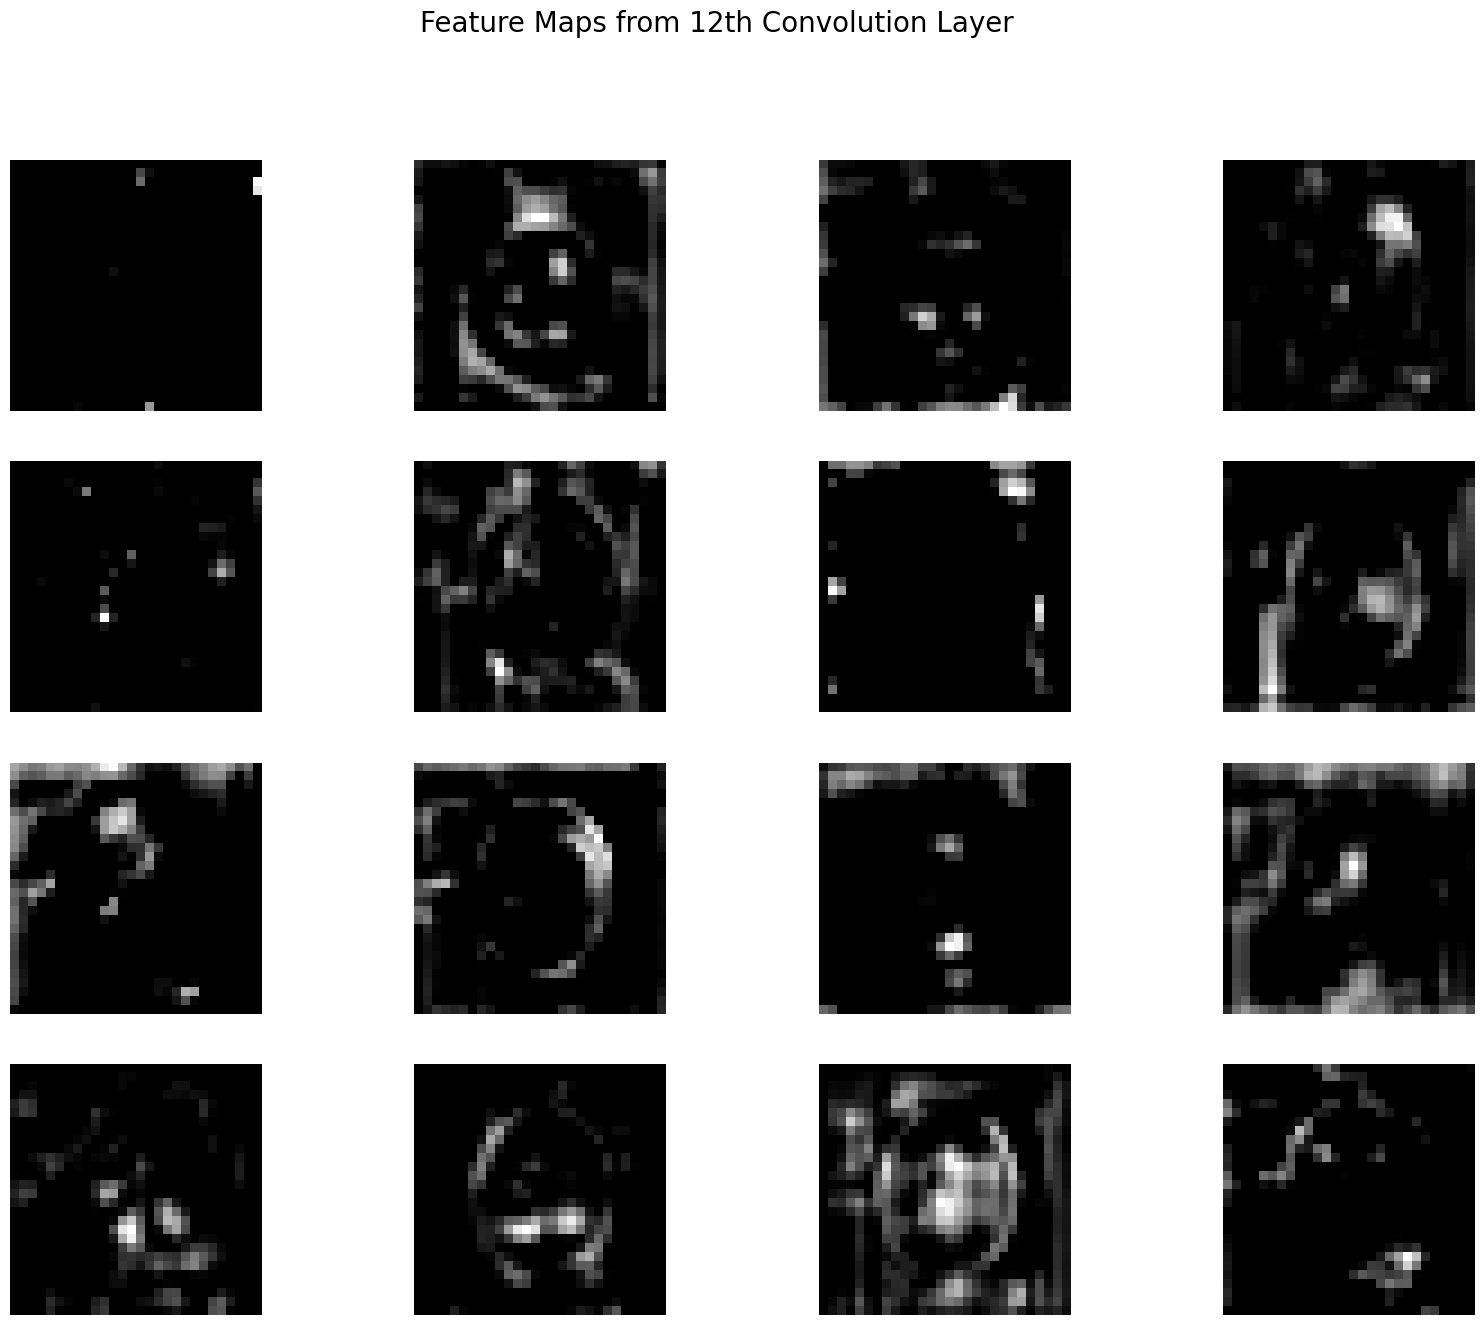

In [ ]:
print("Outputting the features learned by the model's 12th convolution layer")

# Create a model to extract the output of the 12th convolution layer
model = Model(inputs=my_model.inputs, outputs=my_model.layers[12].output)

# Extract a single batch from the dataset
for batch in val_images.take(1):  # Assuming val_images is a tf.data.Dataset object
    # Extract the image and label from the batch
    images = batch
    break

# Calculate the feature maps for the extracted image
features = model.predict(images)

# Choose the number of filters to visualize
num_filters_to_visualize = 16
num_feature_maps = min(features.shape[-1], num_filters_to_visualize)  # Number of filters to visualize

# Calculate the grid size needed to fit the filters
num_cols = 4  # Number of columns in the grid
num_rows = math.ceil(num_feature_maps / num_cols)  # Calculate number of rows needed

# Create a figure for displaying the feature maps
fig = plt.figure(figsize=(20, 15))
fig.suptitle("Feature Maps from 12th Convolution Layer", fontsize=20)

# Plot each feature map
for i in range(num_feature_maps):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(features[0, :, :, i], cmap='gray')  # Adjust for the batch dimension
    plt.axis('off')  # Hide axes for better visualization

# Show the plot
plt.show()